<div style="display: flex; justify-content: center;">
    <img src="attachment:43357b0b-8d71-46a8-aabf-773f27040630.png" width="10%">
    <img src="attachment:f2f61b9a-d60c-42eb-8e67-84be576a9a7d.png" width="10%">
</div>

In [ ]:
#importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Function to load and preview dataset
def load_and_preview_dataset(file_path, n_rows=5):

    df = pd.read_csv(file_path)
    print(f"First {n_rows} rows of the dataset:")
    print(df.head(n_rows))
    return df

# Load dataset
dataset_path = "GMDATA.csv"
data = load_and_preview_dataset(dataset_path)


,BASIN:,GOM,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,FIELD,CANTARELL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WELL,A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ft,US/F,US/F,unitless,API,V/V,ppg,ohm.m,G/C3
3,DEPTH,DT,DTSM,FLAG_PP,GR,NPHI,PPG,RDEEP,RHOB
4,7000,-9999,-9999,-9999,-9999,-9999,8.582555771,-9999,-9999


In [ ]:
# Function to display the first N rows of any DataFrame
def display_dataset_head(df, n_rows=10):

    print(f"Displaying the first {n_rows} rows of the dataset:")
    print(df.head(n_rows))

# Display the first 10 rows
display_dataset_head(data, n_rows=10)


Dataset Head:
  BASIN:         GOM Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5   Unnamed: 6  \
0   FIELD  CANTARELL        NaN        NaN        NaN        NaN          NaN   
1    WELL         A3        NaN        NaN        NaN        NaN          NaN   
2      Ft       US/F       US/F   unitless        API        V/V          ppg   
3   DEPTH         DT       DTSM    FLAG_PP         GR       NPHI          PPG   
4    7000      -9999      -9999      -9999      -9999      -9999  8.582555771   
5    7001      -9999      -9999      -9999      -9999      -9999  8.582567215   
6    7002      -9999      -9999      -9999      -9999      -9999  8.582578659   
7    7003      -9999      -9999      -9999      -9999      -9999  8.582590103   
8    7004      -9999      -9999      -9999      -9999      -9999  8.582601547   
9    7005      -9999      -9999      -9999      -9999      -9999  8.582612991   

  Unnamed: 7 Unnamed: 8  
0        NaN        NaN  
1        NaN        NaN  
2      ohm.m    

In [ ]:
# Function to load dataset with a specified header row and preview
def load_dataset_with_custom_header(file_path, header_row=4, n_rows_preview=10):

    df = pd.read_csv(file_path, header=header_row)
    print(f"Dataset loaded using row {header_row + 1} as header. Displaying first {n_rows_preview} rows:")
    print(df.head(n_rows_preview))
    return df

# Reload dataset using 6th row as header
dataset_path = "GMDATA.csv"
data = load_dataset_with_custom_header(dataset_path, header_row=4, n_rows_preview=10)


,DEPTH,DT,DTSM,FLAG_PP,GR,NPHI,PPG,RDEEP,RHOB
0,7000,-9999.0,-9999.0,-9999,-9999.0,-9999.0,8.582556,-9999.0,-9999.0
1,7001,-9999.0,-9999.0,-9999,-9999.0,-9999.0,8.582567,-9999.0,-9999.0
2,7002,-9999.0,-9999.0,-9999,-9999.0,-9999.0,8.582579,-9999.0,-9999.0
3,7003,-9999.0,-9999.0,-9999,-9999.0,-9999.0,8.582590,-9999.0,-9999.0
4,7004,-9999.0,-9999.0,-9999,-9999.0,-9999.0,8.582602,-9999.0,-9999.0
5,7005,-9999.0,-9999.0,-9999,-9999.0,-9999.0,8.582613,-9999.0,-9999.0
6,7006,-9999.0,-9999.0,-9999,-9999.0,-9999.0,8.582624,-9999.0,-9999.0
7,7007,-9999.0,-9999.0,-9999,-9999.0,-9999.0,8.582636,-9999.0,-9999.0
8,7008,-9999.0,-9999.0,-9999,-9999.0,-9999.0,8.582647,-9999.0,-9999.0
9,7009,-9999.0,-9999.0,-9999,-9999.0,-9999.0,8.582659,-9999.0,-9999.0


In [ ]:
# Function to display dataset information
def display_dataset_info(df):

    print("Dataset Information:")
    df_info = df.info()
    print(df_info)

# Display dataset info
display_dataset_info(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13818 entries, 0 to 13817
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEPTH    13818 non-null  int64  
 1   DT       13818 non-null  float64
 2   DTSM     13818 non-null  float64
 3   FLAG_PP  13818 non-null  int64  
 4   GR       13818 non-null  float64
 5   NPHI     13818 non-null  float64
 6   PPG      13818 non-null  float64
 7   RDEEP    13818 non-null  float64
 8   RHOB     13818 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 971.7 KB
None


In [ ]:
# Function to load data and replace placeholder values with median values
def load_and_clean_dataset(file_path, header_row=4, placeholder_value=-9999):

    df = pd.read_csv(file_path, header=header_row)
    print(f"Replacing '{placeholder_value}' values with median values in the dataset...")

    # Replace placeholder values with column medians
    df.replace(placeholder_value, df.median(numeric_only=True), inplace=True)

    return df

# Apply function
dataset_path = "GMDATA.csv"
data = load_and_clean_dataset(dataset_path)


In [ ]:
data.head(10)

,DEPTH,DT,DTSM,FLAG_PP,GR,NPHI,PPG,RDEEP,RHOB
0,7000,90.18045,192.19825,1,104.367001,0.319204,8.582556,1.14,2.2168
1,7001,90.18045,192.19825,1,104.367001,0.319204,8.582567,1.14,2.2168
2,7002,90.18045,192.19825,1,104.367001,0.319204,8.582579,1.14,2.2168
3,7003,90.18045,192.19825,1,104.367001,0.319204,8.582590,1.14,2.2168
4,7004,90.18045,192.19825,1,104.367001,0.319204,8.582602,1.14,2.2168
5,7005,90.18045,192.19825,1,104.367001,0.319204,8.582613,1.14,2.2168
6,7006,90.18045,192.19825,1,104.367001,0.319204,8.582624,1.14,2.2168
7,7007,90.18045,192.19825,1,104.367001,0.319204,8.582636,1.14,2.2168
8,7008,90.18045,192.19825,1,104.367001,0.319204,8.582647,1.14,2.2168
9,7009,90.18045,192.19825,1,104.367001,0.319204,8.582659,1.14,2.2168


In [ ]:
# Function to drop rows with missing values from a DataFrame
def drop_missing_values(df):

    df_cleaned = df.dropna()
    print(f"Rows remaining after dropping missing values: {df_cleaned.shape[0]}")
    return df_cleaned

# Apply the function to clean the dataset
data = drop_missing_values(data)


In [ ]:
# Function to display the first N rows of the cleaned dataset
def preview_cleaned_data(df, n_rows=10):

    print(f"Previewing the first {n_rows} rows after cleaning:")
    print(df.head(n_rows))

# Preview first 10 rows
preview_cleaned_data(data, n_rows=10)


,DEPTH,DT,DTSM,FLAG_PP,GR,NPHI,PPG,RDEEP,RHOB
0,7000,90.18045,192.19825,1,104.367001,0.319204,8.582556,1.14,2.2168
1,7001,90.18045,192.19825,1,104.367001,0.319204,8.582567,1.14,2.2168
2,7002,90.18045,192.19825,1,104.367001,0.319204,8.582579,1.14,2.2168
3,7003,90.18045,192.19825,1,104.367001,0.319204,8.582590,1.14,2.2168
4,7004,90.18045,192.19825,1,104.367001,0.319204,8.582602,1.14,2.2168
5,7005,90.18045,192.19825,1,104.367001,0.319204,8.582613,1.14,2.2168
6,7006,90.18045,192.19825,1,104.367001,0.319204,8.582624,1.14,2.2168
7,7007,90.18045,192.19825,1,104.367001,0.319204,8.582636,1.14,2.2168
8,7008,90.18045,192.19825,1,104.367001,0.319204,8.582647,1.14,2.2168
9,7009,90.18045,192.19825,1,104.367001,0.319204,8.582659,1.14,2.2168


In [ ]:
# Function to save cleaned dataset to CSV
def save_cleaned_data(df, file_name):

    df.to_csv(file_name, index=False)
    print(f"Cleaned dataset saved as '{file_name}'.")

# Function to load a dataset from CSV and preview it
def load_and_preview_saved_data(file_name, n_rows=10):

    df = pd.read_csv(file_name)
    print(f"Previewing the first {n_rows} rows from '{file_name}':")
    print(df.head(n_rows))
    return df

# Save and reload the cleaned data
cleaned_file_name = "cleaned_data.csv"
save_cleaned_data(data, cleaned_file_name)
new_data = load_and_preview_saved_data(cleaned_file_name, n_rows=10)


,DEPTH,DT,DTSM,FLAG_PP,GR,NPHI,PPG,RDEEP,RHOB
0,7000,90.18045,192.19825,1,104.367001,0.319204,8.582556,1.14,2.2168
1,7001,90.18045,192.19825,1,104.367001,0.319204,8.582567,1.14,2.2168
2,7002,90.18045,192.19825,1,104.367001,0.319204,8.582579,1.14,2.2168
3,7003,90.18045,192.19825,1,104.367001,0.319204,8.582590,1.14,2.2168
4,7004,90.18045,192.19825,1,104.367001,0.319204,8.582602,1.14,2.2168
5,7005,90.18045,192.19825,1,104.367001,0.319204,8.582613,1.14,2.2168
6,7006,90.18045,192.19825,1,104.367001,0.319204,8.582624,1.14,2.2168
7,7007,90.18045,192.19825,1,104.367001,0.319204,8.582636,1.14,2.2168
8,7008,90.18045,192.19825,1,104.367001,0.319204,8.582647,1.14,2.2168
9,7009,90.18045,192.19825,1,104.367001,0.319204,8.582659,1.14,2.2168


In [ ]:
# Function to summarize dataset structure and metadata
def summarize_dataset(df):

    print("Dataset Summary Information:")
    df.info()

# Display info for the cleaned data
summarize_dataset(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13818 entries, 0 to 13817
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEPTH    13818 non-null  int64  
 1   DT       13818 non-null  float64
 2   DTSM     13818 non-null  float64
 3   FLAG_PP  13818 non-null  int64  
 4   GR       13818 non-null  float64
 5   NPHI     13818 non-null  float64
 6   PPG      13818 non-null  float64
 7   RDEEP    13818 non-null  float64
 8   RHOB     13818 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 971.7 KB


In [ ]:
# Function to check and display the number of missing values per column
def check_missing_values(df):

    print("Missing Values per Column:")
    missing_values = df.isnull().sum()
    print(missing_values)

# Check for missing values in the dataset
check_missing_values(data)


DEPTH      0
DT         0
DTSM       0
FLAG_PP    0
GR         0
NPHI       0
PPG        0
RDEEP      0
RHOB       0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

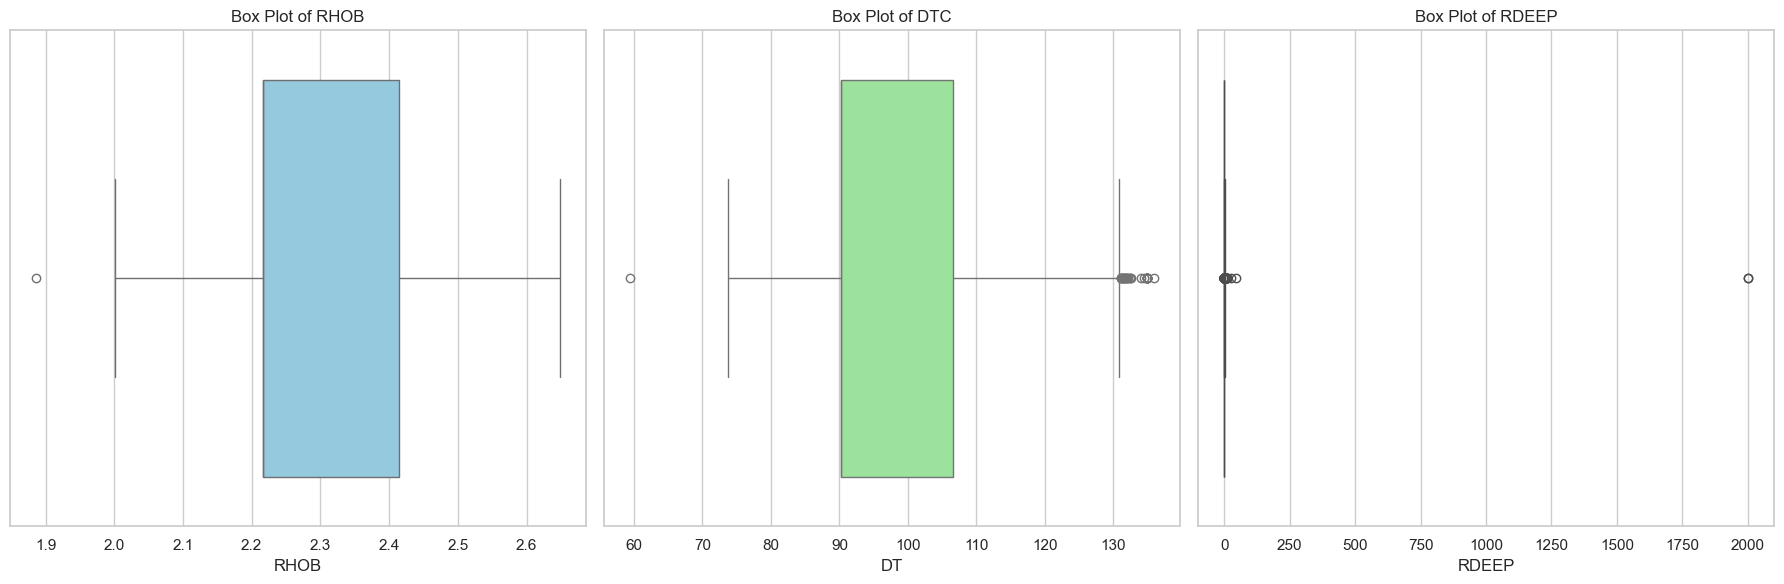

In [ ]:
# Function to plot box plots for specified columns in a DataFrame
def plot_box_plots(df, columns, colors, titles):

    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1, len(columns), figsize=(6 * len(columns), 6))

    for idx, col in enumerate(columns):
        sns.boxplot(data=df, x=col, ax=axes[idx], color=colors[idx])
        axes[idx].set_title(titles[idx])
        axes[idx].set_xlabel(col)

    plt.tight_layout()
    plt.show()

# Specify columns, colors, and titles
columns_to_plot = ["RHOB", "DT", "RDEEP"]
colors_list = ["skyblue", "lightgreen", "red"]
titles_list = ["Box Plot of RHOB", "Box Plot of DTC", "Box Plot of RDEEP"]

# Plot the box plots
plot_box_plots(data, columns_to_plot, colors_list, titles_list)


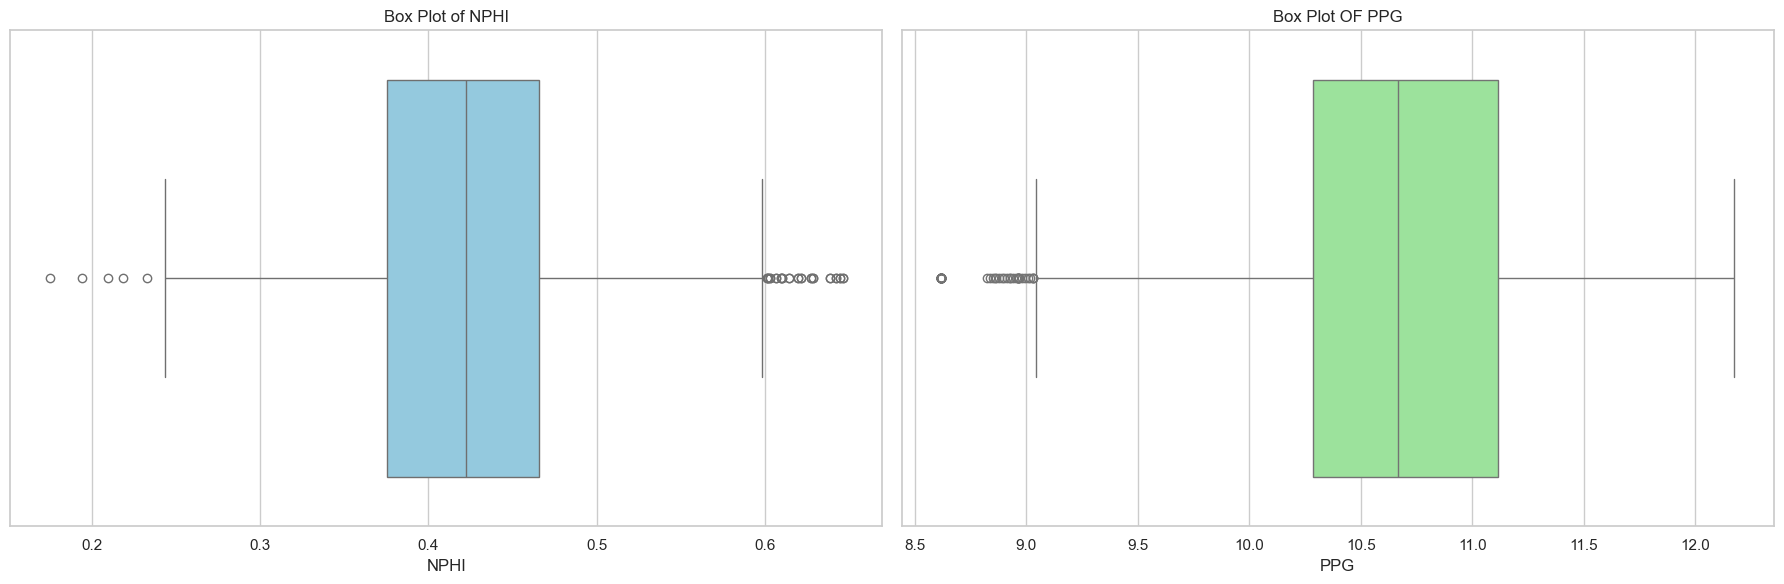

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create box plots for multiple columns in a DataFrame
def plot_multiple_boxplots(df, columns, colors, titles, figsize=(18, 6)):

    sns.set(style="whitegrid")

    fig, axes = plt.subplots(1, len(columns), figsize=figsize)

    for i, col in enumerate(columns):
        sns.boxplot(data=df, x=col, ax=axes[i], color=colors[i])
        axes[i].set_title(titles[i])
        axes[i].set_xlabel(col)

    plt.tight_layout()
    plt.show()

# Columns, colors, and titles for this specific example
columns = ["NPHI", "PPG"]
colors = ["skyblue", "lightgreen"]
titles = ["Box Plot of NPHI", "Box Plot of PPG"]

# Call the function
plot_multiple_boxplots(data, columns, colors, titles, figsize=(18, 6))


In [ ]:
# Load the cleaned dataset with a defined variable name
cleaned_file = 'cleaned_data.csv'
data = pd.read_csv(cleaned_file)

print(f"Dataset '{cleaned_file}' loaded successfully.")


In [ ]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU, ELU

In [ ]:
# Function to display summary information of the dataset
def show_dataset_info(df, dataset_name="Dataset"):

    print(f"\nSummary information for {dataset_name}:")
    df.info()

# Display info for the reloaded cleaned data
show_dataset_info(data, dataset_name="Cleaned Data")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13818 entries, 0 to 13817
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEPTH    13818 non-null  int64  
 1   DT       13818 non-null  float64
 2   DTSM     13818 non-null  float64
 3   FLAG_PP  13818 non-null  int64  
 4   GR       13818 non-null  float64
 5   NPHI     13818 non-null  float64
 6   PPG      13818 non-null  float64
 7   RDEEP    13818 non-null  float64
 8   RHOB     13818 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 971.7 KB


In [ ]:
# Function to preview the first few rows of a DataFrame
def preview_dataset(df, n_rows=5, dataset_name="Dataset"):

    print(f"\nFirst {n_rows} rows of {dataset_name}:")
    print(df.head(n_rows))

# Preview the first 5 rows of the cleaned data
preview_dataset(data, n_rows=5, dataset_name="Cleaned Data")


,DEPTH,DT,DTSM,FLAG_PP,GR,NPHI,PPG,RDEEP,RHOB
0,7000,90.18045,192.19825,1,104.367001,0.319204,8.582556,1.14,2.2168
1,7001,90.18045,192.19825,1,104.367001,0.319204,8.582567,1.14,2.2168
2,7002,90.18045,192.19825,1,104.367001,0.319204,8.582579,1.14,2.2168
3,7003,90.18045,192.19825,1,104.367001,0.319204,8.582590,1.14,2.2168
4,7004,90.18045,192.19825,1,104.367001,0.319204,8.582602,1.14,2.2168


In [ ]:
# Function to separate features and target variable
def separate_features_and_target(df, target_column, columns_to_drop):

    X = df.drop(columns=columns_to_drop)
    y = df[target_column]

    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")

    return X, y

# Specify columns to drop and target
columns_to_remove = ["DEPTH", "DTSM", "FLAG_PP", "GR", "PPG"]
target_column = "PPG"

# Perform separation
X, y = separate_features_and_target(data, target_column, columns_to_remove)


In [ ]:
# Function to preview the first few rows of the feature set
def preview_features(X, n_rows=5):

    print(f"\nFirst {n_rows} rows of feature set X:")
    print(X.head(n_rows))

# Preview the first 5 rows of X
preview_features(X, n_rows=5)


,DT,NPHI,RDEEP,RHOB
0,90.18045,0.319204,1.14,2.2168
1,90.18045,0.319204,1.14,2.2168
2,90.18045,0.319204,1.14,2.2168
3,90.18045,0.319204,1.14,2.2168
4,90.18045,0.319204,1.14,2.2168


In [ ]:
# Function to define features that require scaling
def get_features_to_scale():

    features = ["DT", "NPHI", "RDEEP", "RHOB"]
    print(f"Features selected for scaling: {features}")
    return features

# Retrieve list of features to scale
features_to_scale = get_features_to_scale()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to scale selected features
def scale_selected_features(X, features):

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X[features])
    print("Features scaled successfully.")
    return X_scaled, scaler

# Function to split dataset into train, validation, and test sets
def split_dataset(X_scaled, y, test_size=0.2, val_size=0.25, random_state=42):

    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=random_state, shuffle=True
    )

    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size, random_state=random_state, shuffle=True
    )

    print("Data split into training, validation, and test sets.")
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Validation set size: {X_val.shape[0]} samples")
    print(f"Test set size: {X_test.shape[0]} samples")

    return X_train, X_val, X_test, y_train, y_val, y_test

# Apply scaling
X_scaled, scaler = scale_selected_features(X, features_to_scale)

# Apply splitting
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X_scaled, y)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2

# Function to build the neural network model
def build_regression_model(input_shape):

    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.1),
        Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.1),
        Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dense(1, activation="linear")
    ])

    return model

# Build the model using the function
model = build_regression_model(X_train.shape[1])


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Function to compile the model
def compile_regression_model(model, learning_rate=0.0001):
    """
    Compiles the regression model with Adam optimizer and MSE loss.

    Parameters:
    - model: Keras model instance
    - learning_rate: float, learning rate for the optimizer
    """
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss="mse",
                  metrics=["mae"])
    print("Model compiled successfully with Adam optimizer and MSE loss.")

# Function to set up early stopping
def get_early_stopping(patience=10):
    """
    Returns an EarlyStopping callback configured for validation loss.

    Parameters:
    - patience: int, number of epochs to wait before stopping after no improvement

    Returns:
    - early_stopping: EarlyStopping callback instance
    """
    return EarlyStopping(
        monitor="val_loss",
        patience=patience,
        restore_best_weights=True
    )

# Function to train the model
def train_regression_model(model, X_train, y_train, X_val, y_val, epochs=150, batch_size=16):

    early_stopping = get_early_stopping()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=1
    )
    return history

# Apply functions
compile_regression_model(model)
history = train_regression_model(model, X_train, y_train, X_val, y_val)


Epoch 1/150
519/519 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 92.9651 - mae: 9.5853 - val_loss: 83.0337 - val_mae: 9.0917
Epoch 2/150
519/519 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 82.6311 - mae: 9.0516 - val_loss: 70.4026 - val_mae: 8.3665
Epoch 3/150
519/519 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 68.0653 - mae: 8.2080 - val_loss: 53.5608 - val_mae: 7.2920
Epoch 4/150
519/519 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 50.8150 - mae: 7.0824 - val_loss: 38.6096 - val_mae: 6.1836
Epoch 5/150
519/519 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 34.4322 - mae: 5.8133 - val_loss: 22.1053 - val_mae: 4.6623
Epoch 6/150
519/519 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 20.7942 - mae: 4.4928 - val_loss: 11.4275 - val_mae: 3.3217
Epoch 7/150
519/519 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 10.7602 - mae: 3.1909 - val_loss: 5.2159 - val_mae: 2.2042
Epoch 8/150
519/519 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4.7283 - mae: 2.0481 - val_loss: 1.6777 - val_mae: 1.1583
Epoch 9/150
519/519 ━━━━━━━━━━━━━━━

In [ ]:
# Function to evaluate the model on test data
def evaluate_model_performance(model, X_test, y_test):

    evaluation = model.evaluate(X_test, y_test, verbose=1)
    print(f"\nTest Loss (MSE): {evaluation[0]:.4f}")
    print(f"Test MAE: {evaluation[1]:.4f}")
    return evaluation

# Perform model evaluation
evaluation_results = evaluate_model_performance(model, X_test, y_test)


87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2059 - mae: 0.2602
Test Loss: 0.2042684108018875
Test MAE: 0.256807416677475


In [ ]:
import matplotlib.pyplot as plt

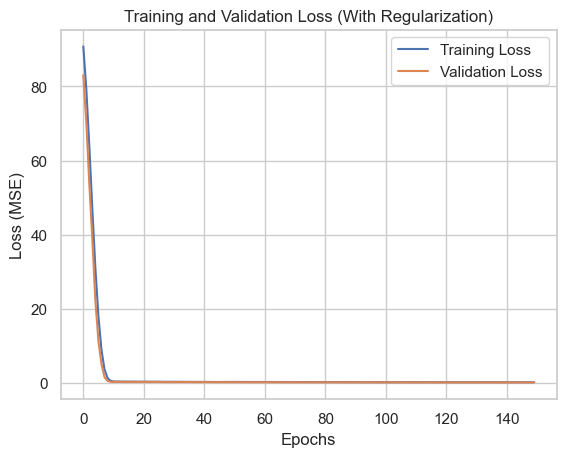

In [ ]:
import matplotlib.pyplot as plt

# Function to plot and save training and validation loss
def plot_and_save_training_history(history, filename="training_validation_loss.png"):

    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.title('Training and Validation Loss (With Regularization)')
    plt.tight_layout()

    # Save the plot
    plt.savefig(filename, dpi=300)
    print(f"Training history plot saved as '{filename}'.")

    plt.show()

# Call the function with your history object
plot_and_save_training_history(history, filename="training_validation_loss.png")


87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


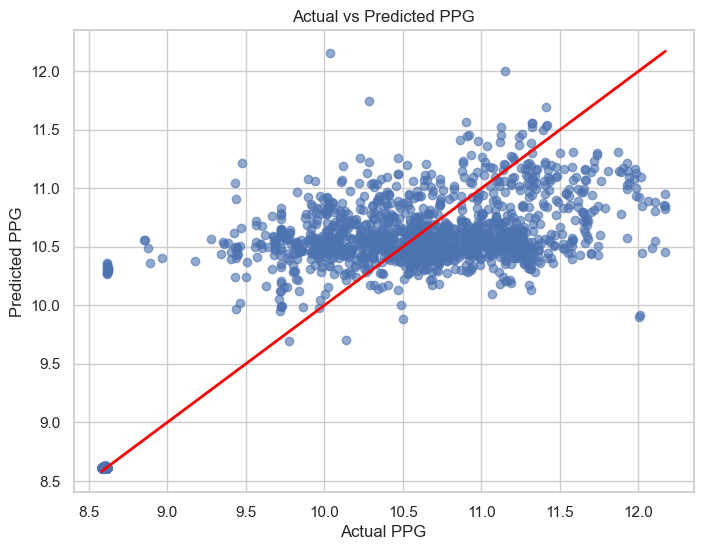

In [ ]:
import matplotlib.pyplot as plt

# Function to plot actual vs. predicted values
def plot_actual_vs_predicted(y_true, y_pred, title="Actual vs Predicted PPG"):

    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', lw=2)
    plt.xlabel('Actual PPG')
    plt.ylabel('Predicted PPG')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Predict on the test set and plot
test_predictions = model.predict(X_test)
plot_actual_vs_predicted(y_test, test_predictions)


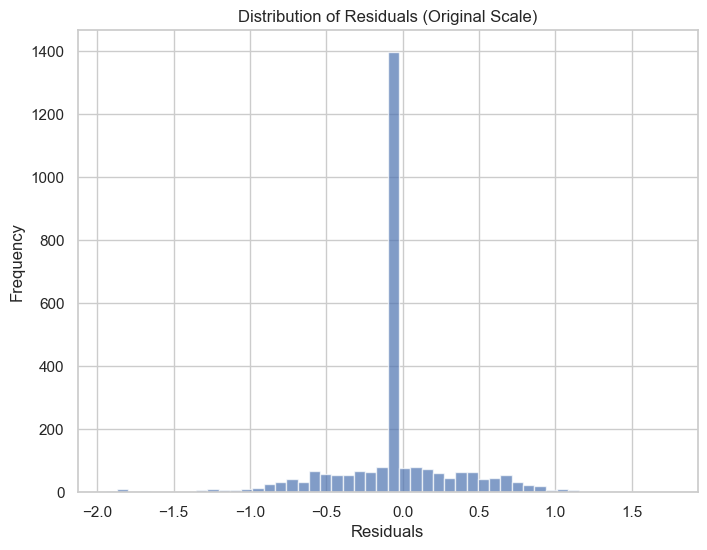

In [ ]:
# Function to plot residuals distribution
def plot_residuals_distribution(y_true, y_pred, bins=50, title="Distribution of Residuals (Original Scale)"):

    residuals = y_true - y_pred.flatten()  # Ensure shape compatibility
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=bins, alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot residuals
plot_residuals_distribution(y_test, test_predictions)


In [ ]:
import pandas as pd

# Function to create a DataFrame of actual vs predicted values and optionally save it
def create_and_save_predictions_dataframe(y_true, y_pred, filename="PPG_predictions.csv", preview_rows=10):

    results_df = pd.DataFrame({
        'Actual PPG': y_true.values,
        'Predicted PPG': y_pred
    })

    print(f"\nFirst {preview_rows} rows of actual vs. predicted PPG:")
    print(results_df.head(preview_rows))

    results_df.to_csv(filename, index=False)
    print(f"Results saved to '{filename}'.")

    return results_df

# Apply function using model predictions
test_predictions = model.predict(X_test).flatten()
results_df = create_and_save_predictions_dataframe(y_test, test_predictions)


87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
   Actual PPG  Predicted PPG
0    8.596539       8.654433
1    8.615915       8.654608
2   10.044007      10.583436
3   11.135364      10.994990
4   11.647494      10.888799
5   10.315333      10.598997
6   11.161081      10.974826
7    8.612214       8.654657
8    8.610062       8.654874
9   10.980379      11.190454


In [ ]:
from sklearn.metrics import (
    mean_absolute_percentage_error, r2_score, mean_squared_error,
    mean_absolute_error, mean_squared_log_error, explained_variance_score
)
import numpy as np

# Function to compute and display regression performance metrics
def evaluate_regression_performance(y_true, y_pred):

    metrics_dict = {
        'MAPE (%)': mean_absolute_percentage_error(y_true, y_pred) * 100,
        'R-squared (R²)': r2_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSLE': mean_squared_log_error(y_true, y_pred),
        'Explained Variance Score (EVS)': explained_variance_score(y_true, y_pred),
        'Mean Bias Deviation (MBD)': np.mean(y_pred - y_true)
    }

    print("\nPerformance Metrics:")
    print(f"Mean Absolute Percentage Error (MAPE): {metrics_dict['MAPE (%)']:.2f}%")
    print(f"R-squared (R²): {metrics_dict['R-squared (R²)']:.4f}")
    print(f"Root Mean Squared Error (RMSE): {metrics_dict['RMSE']:.4f}")
    print("Additional Metrics:")
    print(f"Mean Absolute Error (MAE): {metrics_dict['MAE']:.4f}")
    print(f"Mean Squared Logarithmic Error (MSLE): {metrics_dict['MSLE']:.4f}")
    print(f"Explained Variance Score (EVS): {metrics_dict['Explained Variance Score (EVS)']:.4f}")
    print(f"Mean Bias Deviation (MBD): {metrics_dict['Mean Bias Deviation (MBD)']:.4f}")

    return metrics_dict

# Evaluate performance using the function
regression_metrics = evaluate_regression_performance(y_test, test_predictions)


Performace Metrics
Mean Absolute Percentage Error (MAPE): 2.50%
R-squared (R²): 0.8635
Root Mean Squared Error (RMSE): 0.4090
Additional Metrics
Mean Absolute Error (MAE): 0.2568
Mean Squared Logarithmic Error (MSLE): 0.0013
Explained Variance Score (EVS): 0.8657
Mean Bias Deviation (MBD): 0.0521
